In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
diabetes = datasets.load_diabetes()

In [367]:
print diabetes['data'].shape
print diabetes['target'].shape

(442L, 10L)
(442L,)


In [26]:
# Use only one feature
X = diabetes.data[:,  2, None]
Y = diabetes['target']

In [32]:
train_x = X[:-30]
train_y = Y[:-30]
test_x = X[-30:]
test_y = Y[-30:]

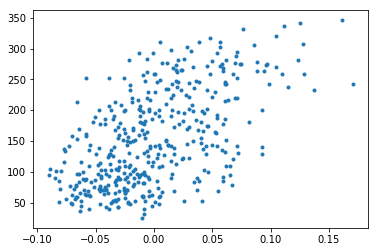

In [33]:
plt.plot(train_x,train_y,'.')

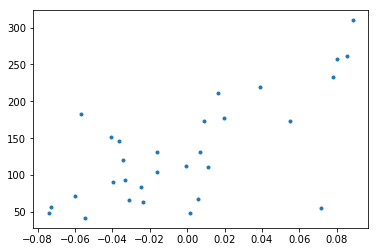

In [34]:
plt.plot(test_x,test_y,'.')

In [37]:
regr = linear_model.LinearRegression()

In [38]:
%timeit regr.fit(test_x, test_y)

1000 loops, best of 3: 357 µs per loop


In [39]:
%timeit y_pred = regr.predict(test_x)

10000 loops, best of 3: 27.6 µs per loop


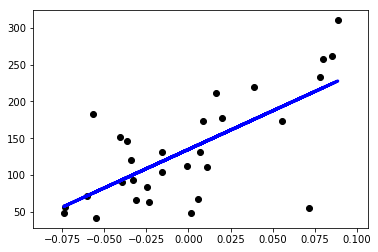

In [36]:
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

In [355]:

# class LinearRegressionModel():
    
#     def __inti__(self,weight):
#         self.weight = None

import autograd 
import pdb
import functools
import autograd.numpy as np
from autograd.misc.optimizers import adam


def callback(weights, iter, gradient):
    if iter % 10 == 0:
        print("Iteration", iter, "Train loss:", training_loss(weights, 0))
        print_training_prediction(weights)

class LinearRegression():
    
    def __init__(self):
        self.model = None
        self.weight = None
        self.x = None
        self.y = None
        
    def fit(self,x,y,alpha=.01,iternum=5000,method='normal_equation'):
        if method=='normal_equation':
            if len(x.shape) < 2:
                raise ValueError("x shape (dim < 2) is not legal.")
            if len(y.shape) >= 2:
                raise ValueError("y shape (dim > 1) is not legal.")
            if x.shape[0] < x.shape[1]:
                raise ValueError("x is singular, may cause error in [normal_equation} method.")
            self.weight = self.fit_normal_equation(x,y)
        elif method == 'gradient':
            x_ = np.c_[np.ones(x.shape[0]),x]
            if self.weight is None:
                self.weight = np.zeros(x_.shape[1])#[:,None]
            func = functools.partial(self.gradient_loss_given_weights,x_,y,add_bias=False)
            
            gradient = autograd.grad(func)
            
#             trained_params = adam(gradient, self.weight, step_size=0.1,
#                           num_iters=1000, callback=callback)
            
            for i in range(iternum):
                if i % (iternum//20) == 0:
                    print('Iteration %-4d | Loss: %.4f' % (i, func(self.weight)))
                self.weight -= gradient(self.weight) * alpha
        else:
            raise NotImplementedError
            
    def predict(self,x):
        return self.predict_use_weight(x,self.weight)
        
    def fit_normal_equation(self,X,Y):
        mat_x = np.matrix(X)
        mat_y = np.matrix(Y).T
        mat_x = np.c_[np.ones(X.shape[0]),mat_x]
        return np.linalg.inv(mat_x.T * mat_x) * mat_x.T * mat_y
    
    def predict_use_weight(self,X,W,add_bias=True):
        if add_bias:
            X = np.c_[np.ones(X.shape[0]),X]
#         return np.squeeze(np.dot(mat_x,W))
        return np.dot(X,W)
    
    def gradient_loss(self,y, y_predicted):
#         pdb.set_trace()
#         return np.mean(np.power((y - y_predicted),2))
        return np.sum(np.abs((y - y_predicted)))
    
    def gradient_loss_given_weights(self,x,y,w,add_bias=False):
        y_predicted = self.predict_use_weight(x,w,add_bias=add_bias)
        return self.gradient_loss(y, y_predicted)

    

In [364]:
lrm = LinearRegression()
lrm.fit(test_x,test_y,method = 'gradient',alpha=.2,iternum=30000)
y_pred = lrm.predict(test_x)

Iteration 0    | Loss: 3999.0000
Iteration 1500 | Loss: 1645.3211
Iteration 3000 | Loss: 1524.4181
Iteration 4500 | Loss: 1403.5148
Iteration 6000 | Loss: 1282.8028
Iteration 7500 | Loss: 1198.8344
Iteration 9000 | Loss: 1169.8545
Iteration 10500 | Loss: 1150.4142
Iteration 12000 | Loss: 1132.4833
Iteration 13500 | Loss: 1119.2582
Iteration 15000 | Loss: 1119.2299
Iteration 16500 | Loss: 1119.2017
Iteration 18000 | Loss: 1119.1735
Iteration 19500 | Loss: 1119.1452
Iteration 21000 | Loss: 1119.1170
Iteration 22500 | Loss: 1119.0891
Iteration 24000 | Loss: 1119.0611
Iteration 25500 | Loss: 1119.0329
Iteration 27000 | Loss: 1119.0102
Iteration 28500 | Loss: 1119.0102


In [343]:
lrm = LinearRegression()
lrm.fit(test_x,test_y)
y_pred_normal = lrm.predict(test_x)

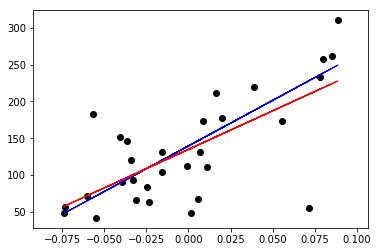

In [365]:
plt.scatter(test_x, test_y, color='black')
plt.plot(test_x, np.asarray(y_pred).reshape(-1), color='blue', linewidth=1)
plt.plot(test_x, np.asarray(y_pred_normal).reshape(-1), color='red', linewidth=1)

## 关于OLS的损失函数优化为凸优化的证明



 $J\left(\theta\right)=J\left(a_0,a_1\right)=\sum_{i=0}^{i=m}\left(y^i-\left(a_1x^i+a_0\right)\right)^2$
 
 $J\left(\theta\right)=J\left(a_0,a_1\right)=\sum_{i=0}^{i=m}\|y^i-\left(a_1x^i+a_0\right)\| $


$$
\begin{eqnarray*}
J\left(a_0,a_1\right)&=&\sum_{i=0}^{i=m}\left(y^i-\left(a_1x^i+a_0\right)\right)^2  \\
&=&\sum_{i=0}^{i=m}\left(y^i\right)^2 + \sum_{i=0}^{i=m}\left(a_0+a_1x^i\right)^2 + \sum_{i=0}^{i=m}2y^i\left(a_0+a_1x^i\right) \\
&=&\sum_{i=0}^{i=m}\left(y^i\right)^2 + \sum_{i=0}^{i=m}\left(a_0\right)^2 + \sum_{i=0}^{i=m}2a_0a_1x^i +\sum_{i=0}^{i=m}\left(a_1x^i\right)^2 + \sum_{i=0}^{i=m}\left(2a_0y^i\right) + \sum_{i=0}^{i=m}\left(2a_1x^iy^i\right) \\
&=&\sum_{i=0}^{i=m}\left[y^i + \left(a_0\right)^2 + 2a_0a_1x^i + \left(a_1x^i\right)^2 + 2a_0y^i + 2a_1x^iy^i\right]
\end{eqnarray*}
$$




 $\frac{\partial J\left(a_0,a_1\right)}{\partial(a_0)} = \sum_{i=0}^{i=m} \left[2a_0 + 2a_1x^i + 2y^i \right] = 0$
 
 $\frac{\partial J\left(a_0,a_1\right)}{\partial(a_1)} = \sum_{i=0}^{i=m} \left[ 2a_0x^i + 2a_1x^i + 2x^iy^i\right] = 0 $

In [366]:
%%latex
$$
\begin{eqnarray*}

$J\left(a_0,a_1\right)&=&\sum_{i=0}^{i=m}\left(y^i-\left(a_1x^i+a_0\right)\right)^2 \\
 
     &=&\sum_{i=0}^{i=m}\left(y^i\right)^2 + \sum_{i=0}^{i=m}\left(a_0+a_1x^i\right)^2 + \sum_{i=0}^{i=m}2y^i\left(a_0+a_1x^i\right)$
 
 $J\left(a_0,a_1\right)=\sum_{i=0}^{i=m}\left(y^i\right)^2 + \sum_{i=0}^{i=m}\left(a_0\right)^2 + \sum_{i=0}^{i=m}2a_0a_1x^i + \sum_{i=0}^{i=m}\left(a_1x^i\right)^2 + \sum_{i=0}^{i=m}\left(2a_0y^i\right) + \sum_{i=0}^{i=m}\left(2a_1x^iy^i\right)$
  
 $J\left(a_0,a_1\right)=\sum_{i=0}^{i=m}\left[y^i + \left(a_0\right)^2 + 2a_0a_1x^i + \left(a_1x^i\right)^2 + 2a_0y^i + 2a_1x^iy^i\right]$
 
 $\frac{\partial J\left(a_0,a_1\right)}{\partial(a_0)} $
 
 \end{eqnarray*}
$$

<IPython.core.display.Latex object>

In [116]:
%timeit w = normal_equation(test_x,test_y)

10000 loops, best of 3: 87.1 µs per loop


In [ ]:
y_pred = predict_use_weight(test_x,w)

In [81]:
mat_x = np.matrix(X)

In [83]:
mat_x = np.c_[np.ones(X.shape[0]),mat_x]

In [84]:
mat_x

matrix([[  1.00000000e+00,   6.16962065e-02],
        [  1.00000000e+00,  -5.14740612e-02],
        [  1.00000000e+00,   4.44512133e-02],
        [  1.00000000e+00,  -1.15950145e-02],
        [  1.00000000e+00,  -3.63846922e-02],
        [  1.00000000e+00,  -4.06959405e-02],
        [  1.00000000e+00,  -4.71628129e-02],
        [  1.00000000e+00,  -1.89470584e-03],
        [  1.00000000e+00,   6.16962065e-02],
        [  1.00000000e+00,   3.90621530e-02],
        [  1.00000000e+00,  -8.38084235e-02],
        [  1.00000000e+00,   1.75059115e-02],
        [  1.00000000e+00,  -2.88400077e-02],
        [  1.00000000e+00,  -1.89470584e-03],
        [  1.00000000e+00,  -2.56065715e-02],
        [  1.00000000e+00,  -1.80618869e-02],
        [  1.00000000e+00,   4.22955892e-02],
        [  1.00000000e+00,   1.21168511e-02],
        [  1.00000000e+00,  -1.05172024e-02],
        [  1.00000000e+00,  -1.80618869e-02],
        [  1.00000000e+00,  -5.68631216e-02],
        [  1.00000000e+00,  -2.237

In [78]:
(mat_x * mat_x.T).shape

(442L, 442L)

In [79]:
mat_y = np.matrix(Y)
#np.concatenate((np.ones(X.shape[1],mat_x)),axis=1)

In [95]:
mat_y.shape

(1L, 442L)

In [96]:
np.linalg.inv(mat_x.T * mat_x) * mat_x.T  * mat_y.T

matrix([[ 152.13348416],
        [ 949.43526038]])

In [91]:
mat_x.T



matrix([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.000000